In [1]:
library(SPATA)
library(SingleCellExperiment)
library(magrittr)
library(ggplot2)


Attaching package: ‘SPATA’


The following object is masked from ‘package:graphics’:

    image


Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, row

In [2]:
n_cluster <- 8
name <- "breast_cancer_1"
results_path <- paste0("/home/uqysun19/60days/Spata_results/", name)

In [3]:
data_path = '/home/uqysun19/60days/10x_visium/breast_cancer_1'

In [4]:
spata_obj <-
  initiateSpataObject_10X(input_paths = data_path, sample_names = "breast_cancer_1")


No gene-set data.frame path specified.

Step 1/6 : Reading in .h5 file.

Loading from directory: '/home/uqysun19/60days/10x_visium/breast_cancer_1/outs'

Step 2/6: Extracting count matrices.

Step 3/6: Extracting images and coordinates-information.

Step 4/6: Performing Seurat-analysis steps.

Skip running SCTransform as it's argument input is neither TRUE nor a list.

Running 'Seurat::NormalizeData()' with specified parameters: 'normalization.method', 'scale.factor'

Running 'Seurat::FindVariableFeatures()' with specified parameters: 'selection.method', 'nfeatures'

Running 'Seurat::ScaleData()' with it's default parameters.

Centering and scaling data matrix

Running 'Seurat::RunPCA()' with specified parameters: 'npcs'

PC_ 1 
Positive:  TCEAL4, MORF4L2, HSPA1A, UQCRQ, NPM1, TXN, CTTN, AGR2, SNRPE, SEC61G 
	   TACSTD2, CERS2, CCND1, S100P, CDH1, ESR1, COX17, CACYBP, NDUFA1, S100A16 
	   AQP3, TCEAL3, COX7A2, POLR2K, AGR3, EFNA1, TSPAN13, UQCRB, ATP5MD, H2AFZ 
Negative:  C3, TIMP1, IG

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3798
Number of edges: 140235

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8575
Number of communities: 13
Elapsed time: 0 seconds


Running 'Seurat::RunTSNE()' with it's default parameters.

Running 'Seurat::RunUMAP()' with specified parameters: 'dims'

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
17:41:35 UMAP embedding parameters a = 0.9922 b = 1.112

17:41:35 Read 3798 rows and found 30 numeric columns

17:41:35 Using Annoy for neighbor search, n_neighbors = 30

17:41:35 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:41:36 Writing NN index file to temp file /var/tmp/pbs.115320.delta2/RtmpqXKmkZ/file2c3a7ce52c20

17:41:36 Searching Annoy index using 1 thre

In [26]:
monocle_clusters <- findMonocleClusters(object = spata_obj,
                                        preprocess_method = "PCA",
                                        reduction_method = c("PCA"),
                                        cluster_method = c("louvain"),
                                            k = 20,
                                        num_iter = 5)

Creating 'cell_data_set'-object.

Preprocessing cells with method 1/1 'PCA'

Using preprocess method 'PCA':

Reducing dimensions with reduction method 1/1: 'PCA' 

Using reduction method PCA:

Clustering barcode-spots with method 1/1: louvain

Done.



In [27]:
examineClusterResults(monocle_clusters)

$cluster_louvain_PCA_k20
 [1] "Cluster 1"  "Cluster 10" "Cluster 11" "Cluster 2"  "Cluster 3" 
 [6] "Cluster 4"  "Cluster 5"  "Cluster 6"  "Cluster 7"  "Cluster 8" 
[11] "Cluster 9"

In [28]:
spata_obj <-
  addFeatures(object = spata_obj,
              feature_names = c("cluster_louvain_PCA_k20"),
              feature_df = monocle_clusters,
              key = "barcodes")

Joining 1 feature.

Done.

Colorclrp 'nejm' contains only 10 values. Need 11. Using default color panel.

Saving 6.67 x 6.67 in image



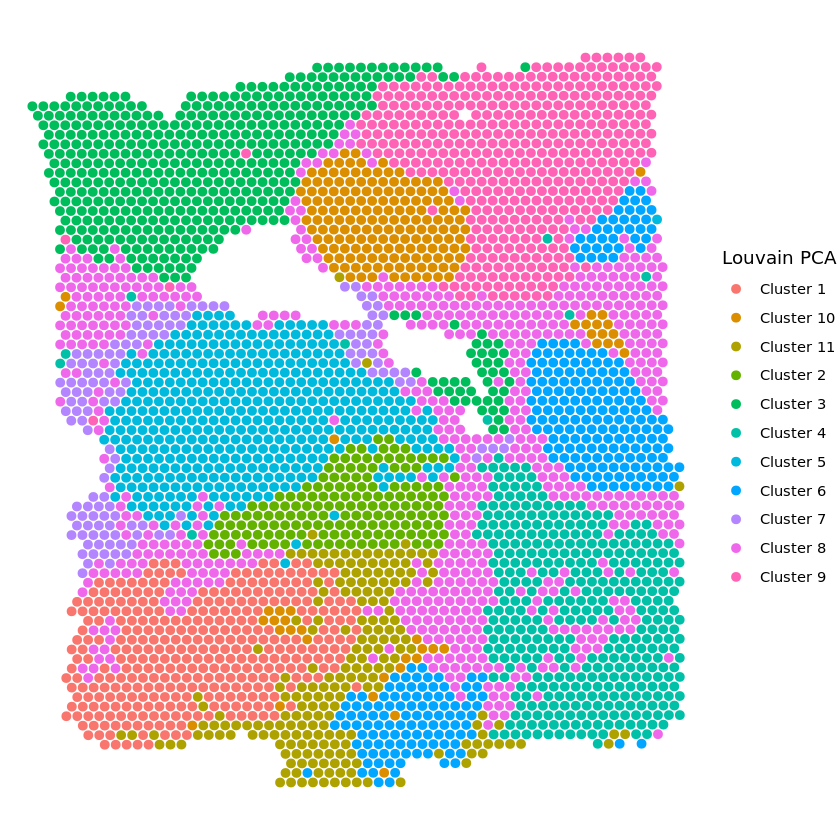

In [29]:
plotSurface(spata_obj,
            color_to = "cluster_louvain_PCA_k20",
            pt_size = 2.1,
            pt_clrp = "nejm") +
  labs(color = "Louvain PCA")
ggsave(paste0(results_path, "_clustering.png"), dpi=300)


In [3]:
n_cluster <- 19
name <- "mouse_brain_coronal"
results_path <- paste0("/home/uqysun19/60days/Spata_results/", name)

In [4]:
data_path = "/home/uqysun19/60days/10x_visium/mouse_brain_coronal"

In [5]:
spata_obj <-
  initiateSpataObject_10X(input_paths = data_path, sample_names = "mouse_brain_coronal")



No gene-set data.frame path specified.

Step 1/6 : Reading in .h5 file.

Loading from directory: '/home/uqysun19/60days/10x_visium/mouse_brain_coronal/outs'

Step 2/6: Extracting count matrices.

Step 3/6: Extracting images and coordinates-information.

Step 4/6: Performing Seurat-analysis steps.

Skip running SCTransform as it's argument input is neither TRUE nor a list.

Running 'Seurat::NormalizeData()' with specified parameters: 'normalization.method', 'scale.factor'

Running 'Seurat::FindVariableFeatures()' with specified parameters: 'selection.method', 'nfeatures'

Running 'Seurat::ScaleData()' with it's default parameters.

Centering and scaling data matrix

Running 'Seurat::RunPCA()' with specified parameters: 'npcs'

PC_ 1 
Positive:  Calm2, Chn1, Olfm1, Ppp3r1, Nrgn, Gpm6a, Ppp3ca, Dnm1, Rtn1, Slc17a7 
	   Ctxn1, Gria2, Enc1, Snca, Fam131a, Mapk1, Cx3cl1, Basp1, Dlgap1, Snap25 
	   Ptk2b, Atp6v1g2, Baiap2, Wasf1, Itpka, Dynll1, Atp6v0c, Camkv, Prkcb, Lingo1 
Negative:  Dbi, M

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2702
Number of edges: 82173

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8837
Number of communities: 18
Elapsed time: 0 seconds


Running 'Seurat::RunTSNE()' with it's default parameters.

Running 'Seurat::RunUMAP()' with specified parameters: 'dims'

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
01:30:42 UMAP embedding parameters a = 0.9922 b = 1.112

01:30:42 Read 2702 rows and found 30 numeric columns

01:30:42 Using Annoy for neighbor search, n_neighbors = 30

01:30:42 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

01:30:42 Writing NN index file to temp file /scratch/tmp/pbs.259642.delta2/RtmpnwjIaJ/file5c1f30e1dc1d

01:30:42 Searching Annoy index using 1 

In [26]:
monocle_clusters <- findMonocleClusters(object = spata_obj,
                                        preprocess_method = "PCA",
                                        reduction_method = c("PCA"),
                                        cluster_method = c("louvain"),
                                            k = 9,
                                        num_iter = 5)

Creating 'cell_data_set'-object.

Preprocessing cells with method 1/1 'PCA'

Using preprocess method 'PCA':

Reducing dimensions with reduction method 1/1: 'PCA' 

Using reduction method PCA:

Clustering barcode-spots with method 1/1: louvain

Done.



In [27]:
a <- examineClusterResults(monocle_clusters)

In [28]:
length(a[[1]])

[1] 19

In [22]:
?findMonocleClusters

In [29]:
spata_obj <-
  addFeatures(object = spata_obj,
              feature_names = c("cluster_louvain_PCA_k9"),
              feature_df = monocle_clusters,
              key = "barcodes")

In [32]:
colors <- c('#F0A0FF','#0075DC','#993F00','#4C005C','#191919','#005C31','#2BCE48','#FFCC99',
           '#808080','#94FFB5','#8F7C00','#9DCC00','#C20088','#003380','#FFA405','#FFA8BB',
           '#426600','#FF0010','#5EF1F2')

Joining 1 feature.

Done.

Colorclrp 'uc' contains only 10 values. Need 19. Using default color panel.

Saving 6.67 x 6.67 in image



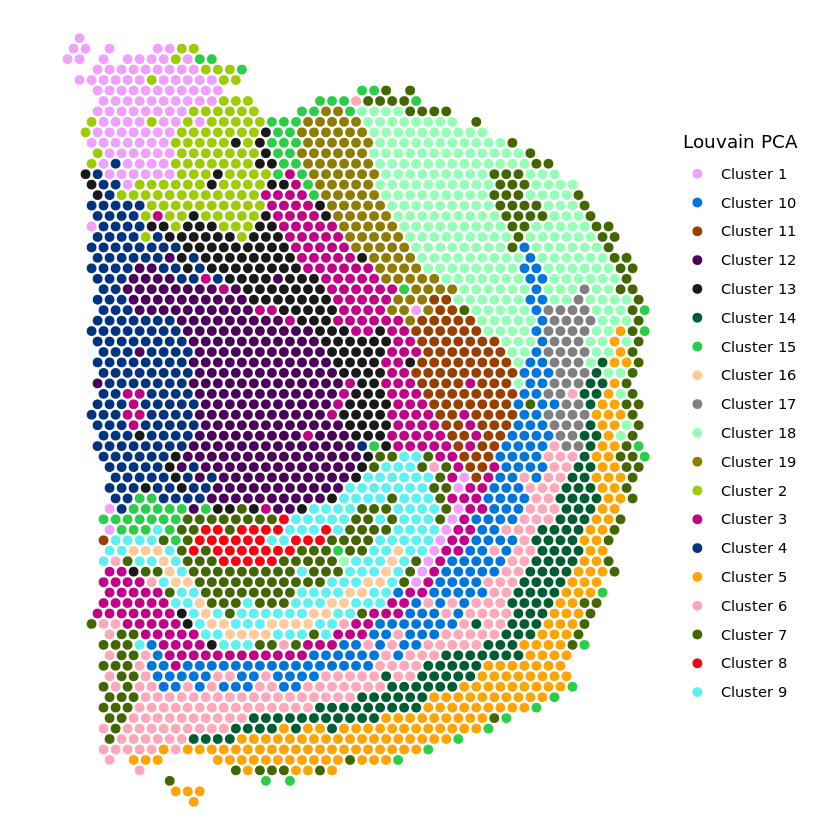

In [48]:
plotSurface(spata_obj,
            color_to = "cluster_louvain_PCA_k9",
            pt_size = 2.1,
            pt_clrp = "uc") +
  labs(color = "Louvain PCA") +
  scale_color_manual(values = colors, na.value = NULL)
ggsave(paste0(results_path, "_clustering_19.png"), dpi=300)



In [44]:
all_colorpanels()

$science
[1] "milo" "jco"  "npg"  "aaas" "nejm" "lo"   "jama" "uc"

In [34]:
?plotSurface

In [9]:
spata_obj@fdata

barcodes,sample,nCount_RNA,nFeature_RNA,percent.mt,percent.RB,RNA_snn_res.0.8,seurat_clusters,segment,cluster_louvain_PCA_k11
<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<chr>,<chr>
AAACAAGTATCTCCCA-1_mouse_brain_coronal,mouse_brain_coronal,20935,5230,0,0,13,13,,Cluster 15
AAACAATCTACTAGCA-1_mouse_brain_coronal,mouse_brain_coronal,14789,3646,0,0,4,4,,Cluster 4
AAACACCAATAACTGC-1_mouse_brain_coronal,mouse_brain_coronal,34646,6272,0,0,7,7,,Cluster 8
AAACAGAGCGACTCCT-1_mouse_brain_coronal,mouse_brain_coronal,16833,4506,0,0,4,4,,Cluster 17
AAACCGGGTAGGTACC-1_mouse_brain_coronal,mouse_brain_coronal,33684,5971,0,0,7,7,,Cluster 14
AAACCGTTCGTCCAGG-1_mouse_brain_coronal,mouse_brain_coronal,32563,6097,0,0,9,9,,Cluster 10
AAACCTCATGAAGTTG-1_mouse_brain_coronal,mouse_brain_coronal,63521,8545,0,0,7,7,,Cluster 14
AAACGAAGAACATACC-1_mouse_brain_coronal,mouse_brain_coronal,42166,7210,0,0,8,8,,Cluster 17
AAACGAGACGGTTGAT-1_mouse_brain_coronal,mouse_brain_coronal,36802,6943,0,0,3,3,,Cluster 6


In [49]:
write.csv(spata_obj@fdata, paste0(results_path, "_clusters_19.csv"))